In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [340]:
df=pd.read_csv('healthcare_dataset.csv')

In [341]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [342]:
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


In [343]:
df.shape

(55500, 15)

In [344]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [346]:
df['Date of Admission']=pd.to_datetime(df['Date of Admission'])
df['Discharge Date']=pd.to_datetime(df['Discharge Date'])


In [347]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [348]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,55500.000000,55500,55500.000000,55500.000000,55500
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.602454,NaN,14211.454431,115.243069,NaN


In [349]:
df.describe(include='object')

,Name,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,40341,39876,5,3,5,3
top,DAvId muNoZ,Male,A-,Arthritis,Michael Smith,LLC Smith,Cigna,Elective,Lipitor,Abnormal
freq,3,27774,6969,9308,27,44,11249,18655,11140,18627


In [350]:
df.duplicated().sum()


534

In [351]:
df.drop_duplicates(inplace=True)



In [352]:
df.shape

(54966, 15)

In [353]:
df.drop(columns=['Name','Room Number'], inplace=True)


In [354]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal


In [355]:
#Creating the age group for analysis
df_child=df[df['Age']<20]
df_young=df[(df['Age']>=20) & (df['Age']<40)]
df_mature=df[(df['Age']>=40) & (df['Age']<60)]
df_old=df[df['Age']>=60]

In [356]:
#Total number of doctors specialized for child age group
df_child['Doctor'].nunique()

1555

In [357]:
#Total number of hospitals which takes children as patients
df_child['Hospital'].nunique()

1536

In [358]:
#Total number of doctors specialized for old age group
df_old['Doctor'].nunique()

17231

In [359]:
#Total number of hospitals which takes elderly as patients
df_old['Hospital'].nunique()

16718

In [360]:
#Analysing what kind of medical condition is mostly seen in child age group
df_child['Medical Condition'].value_counts()

Medical Condition
Arthritis       296
Cancer          282
Hypertension    277
Obesity         276
Asthma          276
Diabetes        270
Name: count, dtype: int64

In [361]:
#Analysing what kind of medical condition is mostly seen in young age group
df_young['Medical Condition'].value_counts()

Medical Condition
Cancer          2689
Obesity         2688
Arthritis       2686
Asthma          2669
Diabetes        2657
Hypertension    2644
Name: count, dtype: int64

In [362]:
#Analysing what kind of medical condition is mostly seen in mature age group
df_mature['Medical Condition'].value_counts()

Medical Condition
Obesity         2775
Diabetes        2761
Arthritis       2753
Hypertension    2714
Cancer          2665
Asthma          2640
Name: count, dtype: int64

In [363]:
#Analysing what kind of medical condition is mostly seen in old age group
df_old['Medical Condition'].value_counts()

Medical Condition
Diabetes        3528
Hypertension    3516
Asthma          3510
Cancer          3504
Arthritis       3483
Obesity         3407
Name: count, dtype: int64

In [364]:
print(df_child['Billing Amount'].mean())
print(df_young['Billing Amount'].mean())
print(df_mature['Billing Amount'].mean())
print(df_old['Billing Amount'].mean())


26321.709621066067
25553.919541811494
25494.188959699484
25513.729550519296


In [365]:
df_child['Admission Type'].value_counts()

Admission Type
Emergency    576
Urgent       554
Elective     547
Name: count, dtype: int64

In [366]:
df_young['Admission Type'].value_counts()


Admission Type
Elective     5419
Urgent       5344
Emergency    5270
Name: count, dtype: int64

In [367]:
df_mature['Admission Type'].value_counts()


Admission Type
Elective     5539
Urgent       5487
Emergency    5282
Name: count, dtype: int64

In [368]:
df_old['Admission Type'].value_counts()

Admission Type
Urgent       7006
Emergency    6974
Elective     6968
Name: count, dtype: int64

In [369]:
df_child['Medication'].value_counts(normalize=True)

Medication
Ibuprofen      0.210495
Penicillin     0.205128
Aspirin        0.199165
Lipitor        0.197973
Paracetamol    0.187239
Name: proportion, dtype: float64

In [370]:
df_young['Medication'].value_counts(normalize=True)

Medication
Lipitor        0.204890
Ibuprofen      0.201085
Penicillin     0.200087
Paracetamol    0.197405
Aspirin        0.196532
Name: proportion, dtype: float64

In [371]:
df_mature['Medication'].value_counts(normalize=True)

Medication
Paracetamol    0.206034
Lipitor        0.200208
Penicillin     0.199657
Ibuprofen      0.197694
Aspirin        0.196407
Name: proportion, dtype: float64

In [372]:
df_old['Medication'].value_counts(normalize=True)

Medication
Aspirin        0.205079
Ibuprofen      0.201547
Lipitor        0.198396
Penicillin     0.198014
Paracetamol    0.196964
Name: proportion, dtype: float64

In [373]:
df_child['Test Results'].value_counts()


Test Results
Normal          583
Abnormal        562
Inconclusive    532
Name: count, dtype: int64

In [374]:
df_young['Test Results'].value_counts()

Test Results
Normal          5455
Abnormal        5324
Inconclusive    5254
Name: count, dtype: int64

In [375]:
df_mature['Test Results'].value_counts()

Test Results
Abnormal        5517
Inconclusive    5440
Normal          5351
Name: count, dtype: int64

In [376]:
df_old['Test Results'].value_counts()

Test Results
Abnormal        7034
Inconclusive    6972
Normal          6942
Name: count, dtype: int64

Now we will analyse the gender column with other columns.


In [377]:
df['Gender'].value_counts()

Gender
Male      27496
Female    27470
Name: count, dtype: int64

In [378]:
pd.crosstab(df['Gender'],df['Blood Type'])

Blood Type,A+,A-,AB+,AB-,B+,B-,O+,O-
Gender,,,,,,,,
Female,3534,3418,3407,3428,3348,3425,3434,3476
Male,3362,3480,3475,3446,3537,3447,3421,3328


<Axes: xlabel='Blood Type', ylabel='Gender'>

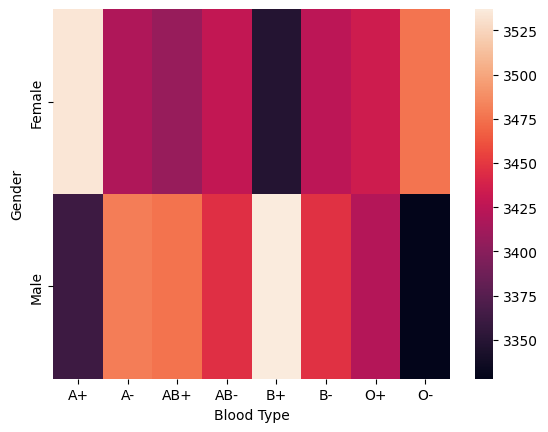

In [379]:
sns.heatmap(pd.crosstab(df['Gender'],df['Blood Type']))

In [380]:
pd.crosstab(df['Gender'],df['Medical Condition'])
#df.groupby('Gender').get_group('Male')['Medical Condition'].value_counts()
#df.groupby('Gender').get_group('Female')['Medical Condition'].value_counts()

Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Gender,,,,,,
Female,4642,4511,4566,4609,4569,4573
Male,4576,4584,4574,4607,4582,4573


In [381]:
#Number of doctors looking for male patients
df.groupby('Gender').get_group('Male')['Doctor'].count()

27496

In [382]:
#Number of doctors looking for female patients
df.groupby('Gender').get_group('Female')['Doctor'].count()


27470

In [383]:
df.groupby('Gender')['Billing Amount'].describe()
#

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,27470.0,25474.098266,14201.542743,-2008.492140,13142.366612,25427.851664,37737.127802,52764.276736
Male,27496.0,25614.447915,14215.178857,-1660.009373,13331.747073,25686.881836,37892.143357,52271.663747


In [384]:
pd.crosstab(df['Gender'],df['Admission Type'])

Admission Type,Elective,Emergency,Urgent
Gender,,,
Female,9281,9166,9023
Male,9192,8936,9368


In [385]:
pd.crosstab(df['Gender'],df['Medication'])

Medication,Aspirin,Ibuprofen,Lipitor,Paracetamol,Penicillin
Gender,,,,,
Female,5569,5546,5500,5388,5467
Male,5415,5477,5538,5577,5489


In [386]:
pd.crosstab(df['Gender'],df['Test Results'])

Test Results,Abnormal,Inconclusive,Normal
Gender,,,
Female,9247,9143,9080
Male,9190,9055,9251


In [387]:
pd.crosstab(df['Blood Type'],df['Medical Condition'])

Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Blood Type,,,,,,
A+,1107,1124,1171,1201,1123,1170
A-,1144,1162,1124,1154,1186,1128
AB+,1124,1173,1100,1165,1204,1116
AB-,1179,1123,1186,1132,1108,1146
B+,1191,1104,1186,1180,1087,1137
B-,1152,1108,1131,1136,1163,1182
O+,1186,1162,1098,1142,1145,1122
O-,1135,1139,1144,1106,1135,1145


<Axes: xlabel='Medical Condition', ylabel='Blood Type'>

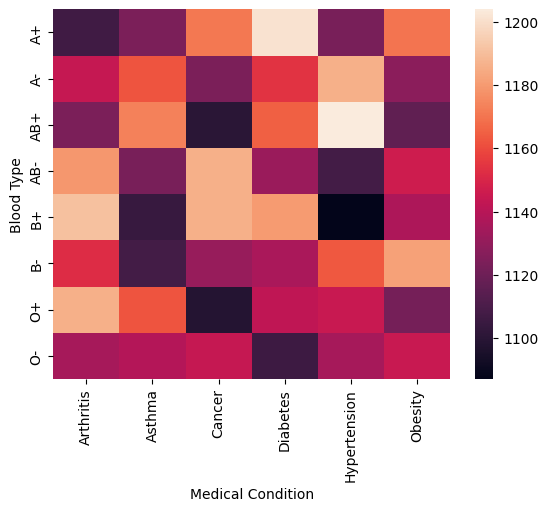

In [388]:
sns.heatmap(pd.crosstab(df['Blood Type'],df['Medical Condition']))

In [389]:
pd.crosstab(df['Blood Type'],df['Admission Type'])

Admission Type,Elective,Emergency,Urgent
Blood Type,,,
A+,2324,2271,2301
A-,2314,2251,2333
AB+,2276,2274,2332
AB-,2365,2241,2268
B+,2223,2341,2321
B-,2302,2238,2332
O+,2307,2284,2264
O-,2362,2202,2240


<Axes: xlabel='Admission Type', ylabel='Blood Type'>

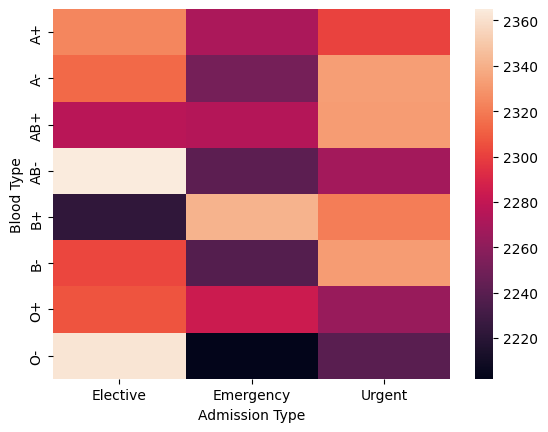

In [390]:
sns.heatmap(pd.crosstab(df['Blood Type'],df['Admission Type']))

<Axes: xlabel='Test Results', ylabel='Blood Type'>

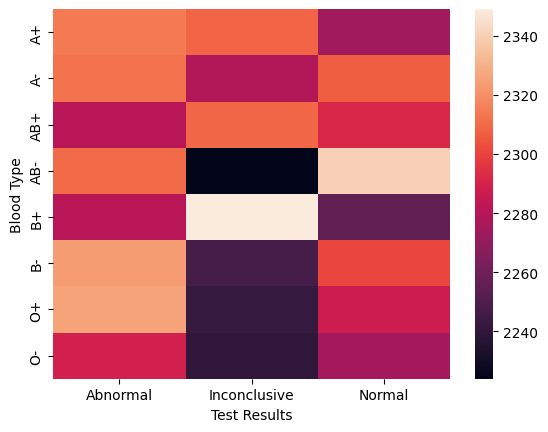

In [391]:
sns.heatmap(pd.crosstab(df['Blood Type'],df['Test Results']))

<Axes: xlabel='Insurance Provider', ylabel='Medical Condition'>

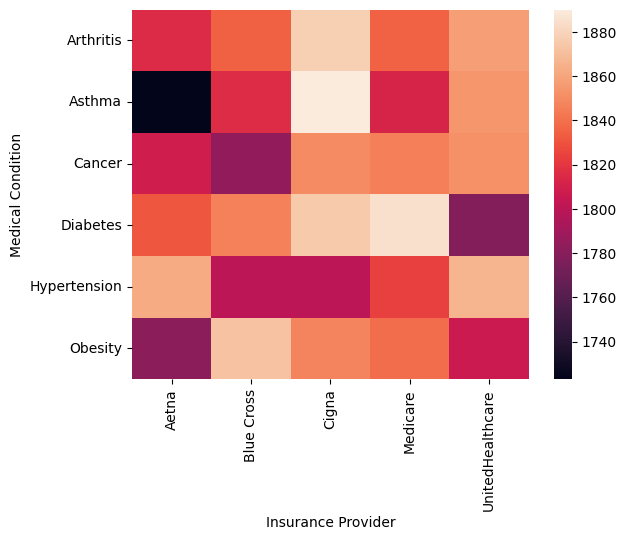

In [392]:
sns.heatmap(pd.crosstab(df['Medical Condition'],df['Insurance Provider']))

<Axes: xlabel='Medication', ylabel='Medical Condition'>

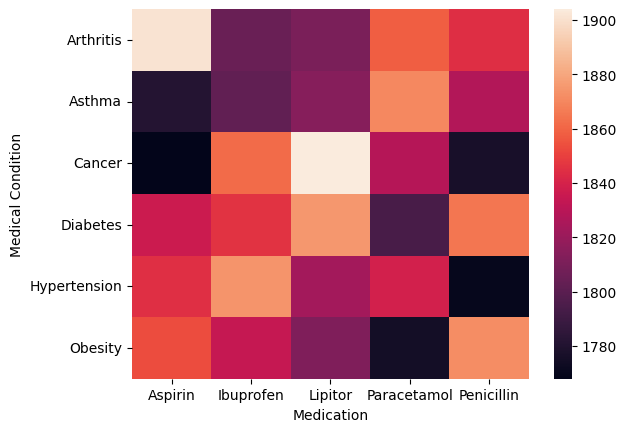

In [393]:
sns.heatmap(pd.crosstab(df['Medical Condition'],df['Medication']))

<Axes: xlabel='Test Results', ylabel='Medical Condition'>

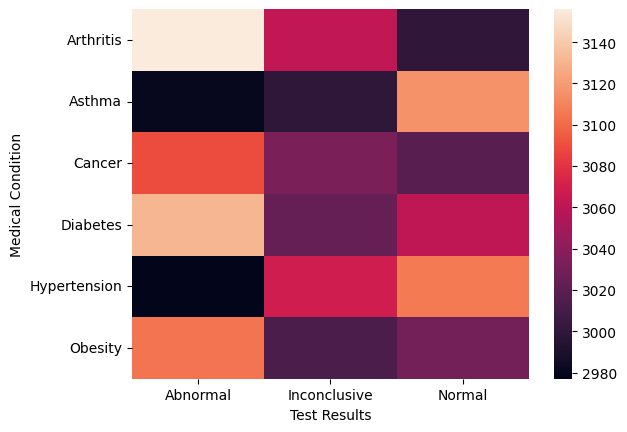

In [394]:
sns.heatmap(pd.crosstab(df['Medical Condition'],df['Test Results']))

In [395]:
df['Duration in hospital']=df['Discharge Date']-df['Date of Admission']

In [396]:
bill_for_hospital=df.groupby('Duration in hospital')['Billing Amount'].mean()
bill_for_hospital


Duration in hospital
1 days     25332.120731
2 days     25275.729178
3 days     25916.841521
4 days     26003.060271
5 days     25472.026206
6 days     25919.776421
7 days     25773.790664
8 days     26094.670590
9 days     25570.781016
10 days    25439.847493
11 days    25127.405957
12 days    25536.225436
13 days    24917.135479
14 days    26247.551479
15 days    25696.726889
16 days    25714.506582
17 days    25436.128867
18 days    24825.920424
19 days    25130.049841
20 days    25888.369619
21 days    25392.221824
22 days    25418.318335
23 days    25893.757902
24 days    25779.646243
25 days    25276.334343
26 days    25630.695421
27 days    25497.078109
28 days    25807.259257
29 days    24867.368933
30 days    25440.718142
Name: Billing Amount, dtype: float64

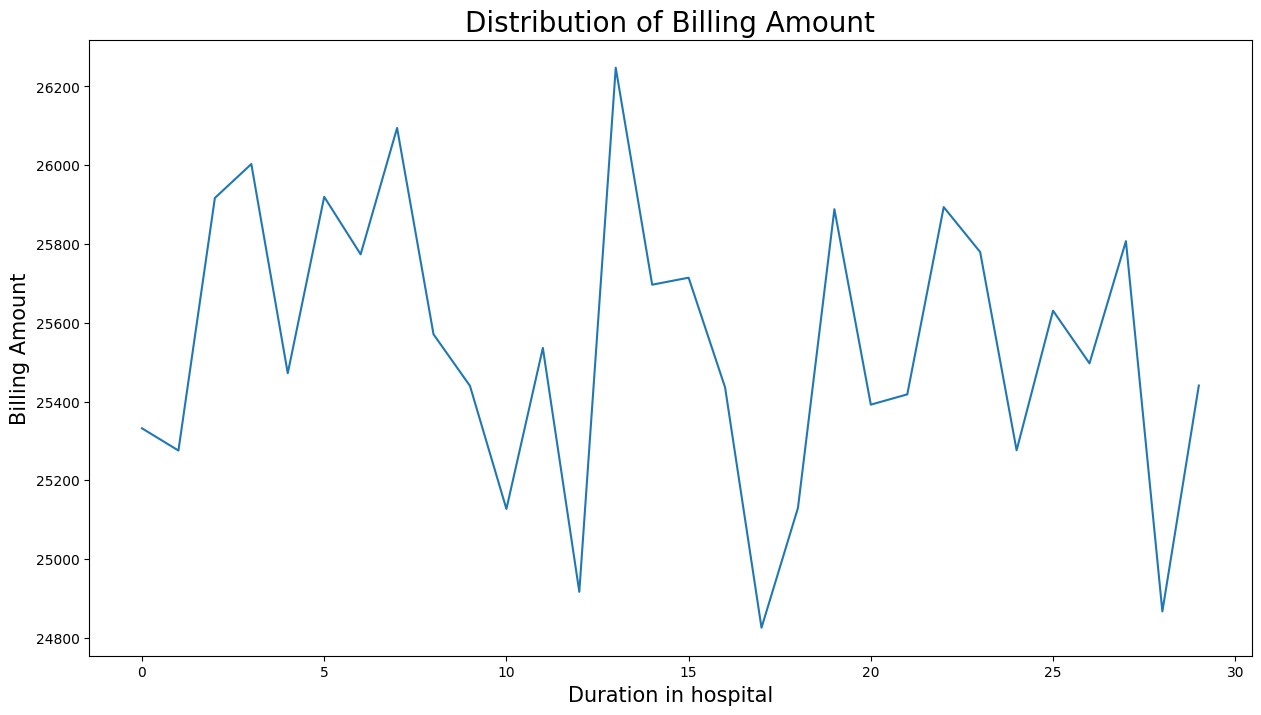

In [397]:
plt.figure(figsize=(15,8))
plt.title('Distribution of Billing Amount',size=20)
plt.xlabel('Duration in hospital',size=15)
plt.ylabel('Billing Amount',size=15)
plt.plot(bill_for_hospital.values)
plt.show()


In [398]:
df.groupby('Insurance Provider')['Billing Amount'].count()

Insurance Provider
Aetna               10822
Blue Cross          10952
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Name: Billing Amount, dtype: int64

<Axes: xlabel='Insurance Provider'>

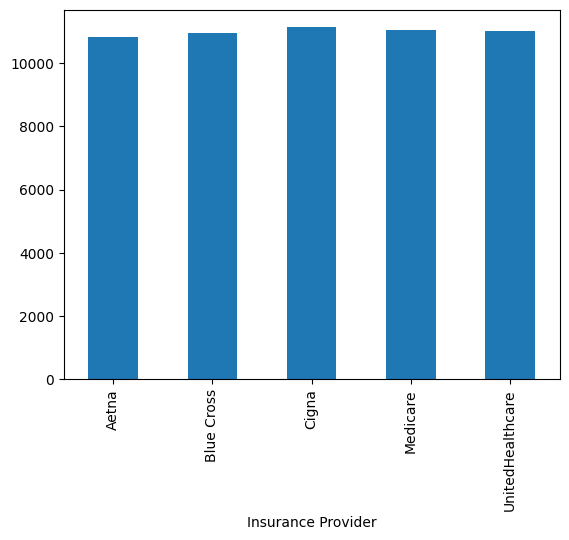

In [399]:
df.groupby('Insurance Provider')['Billing Amount'].count().plot(kind='bar')

<Axes: xlabel='Insurance Provider'>

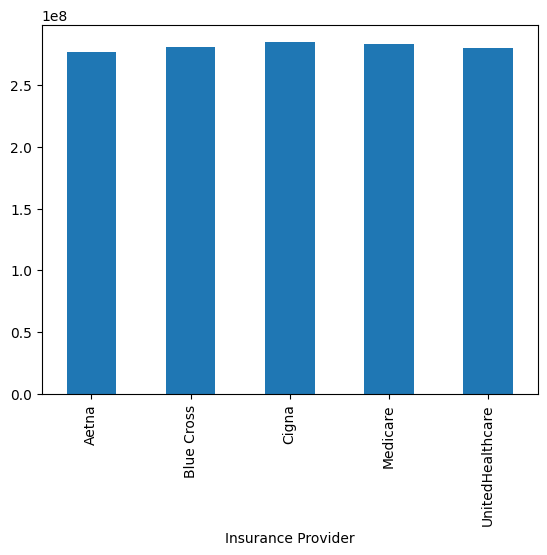

In [400]:
df.groupby('Insurance Provider')['Billing Amount'].sum().plot(kind='bar')

<Axes: xlabel='Test Results', ylabel='Insurance Provider'>

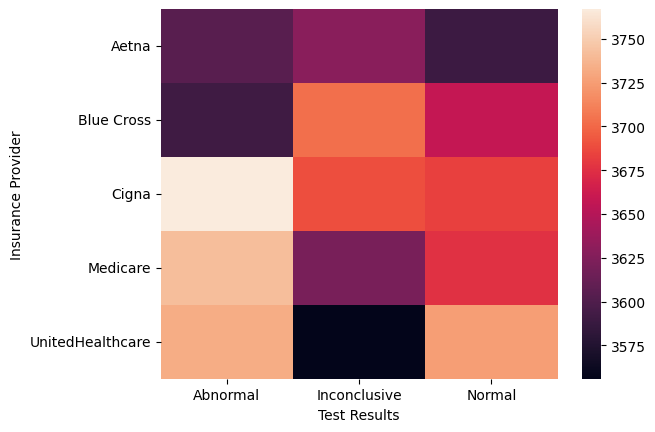

In [401]:
#df.groupby('Insurance Provider')['Test Results'].value_counts()
sns.heatmap(pd.crosstab(df['Insurance Provider'],df['Test Results']))

<Axes: xlabel='Admission Type', ylabel='Billing Amount'>

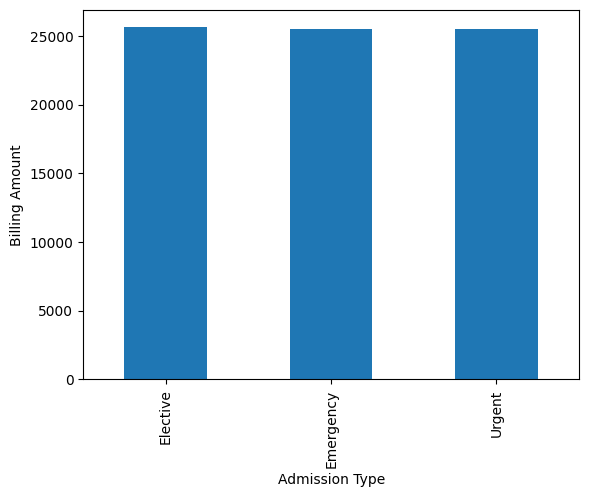

In [402]:
df.groupby('Admission Type')['Billing Amount'].mean().plot(kind='bar',xlabel='Admission Type',ylabel='Billing Amount')

<Axes: xlabel='Test Results', ylabel='Admission Type'>

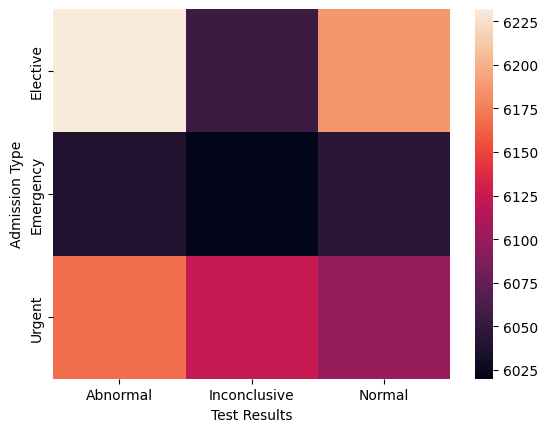

In [403]:
sns.heatmap(pd.crosstab(df['Admission Type'],df['Test Results']))

In [404]:
df.groupby('Medication')['Billing Amount'].mean()

Medication
Aspirin        25597.531263
Ibuprofen      25744.794231
Lipitor        25338.094977
Paracetamol    25557.031434
Penicillin     25484.250365
Name: Billing Amount, dtype: float64

<Axes: xlabel='Admission Type', ylabel='Billing Amount'>

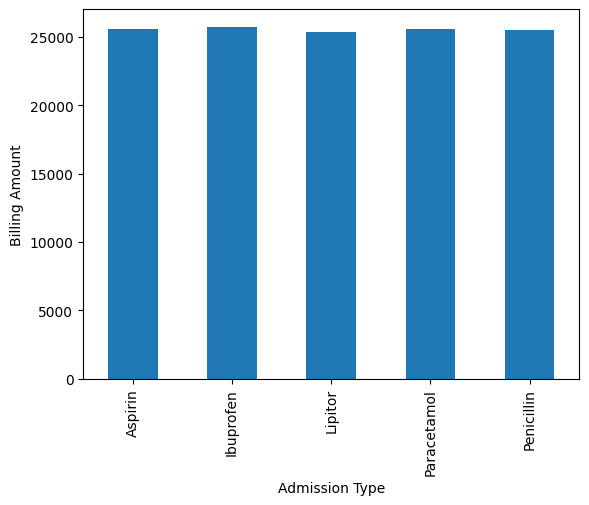

In [405]:
df.groupby('Medication')['Billing Amount'].mean().plot(kind='bar',xlabel='Admission Type',ylabel='Billing Amount')

In [406]:
bill_for_hospital=df.groupby('Duration in hospital')['Medication'].value_counts()
bill_for_hospital

Duration in hospital  Medication 
1 days                Penicillin     393
                      Ibuprofen      382
                      Aspirin        368
                      Lipitor        335
                      Paracetamol    330
                                    ... 
30 days               Lipitor        398
                      Paracetamol    377
                      Ibuprofen      376
                      Aspirin        365
                      Penicillin     338
Name: count, Length: 150, dtype: int64

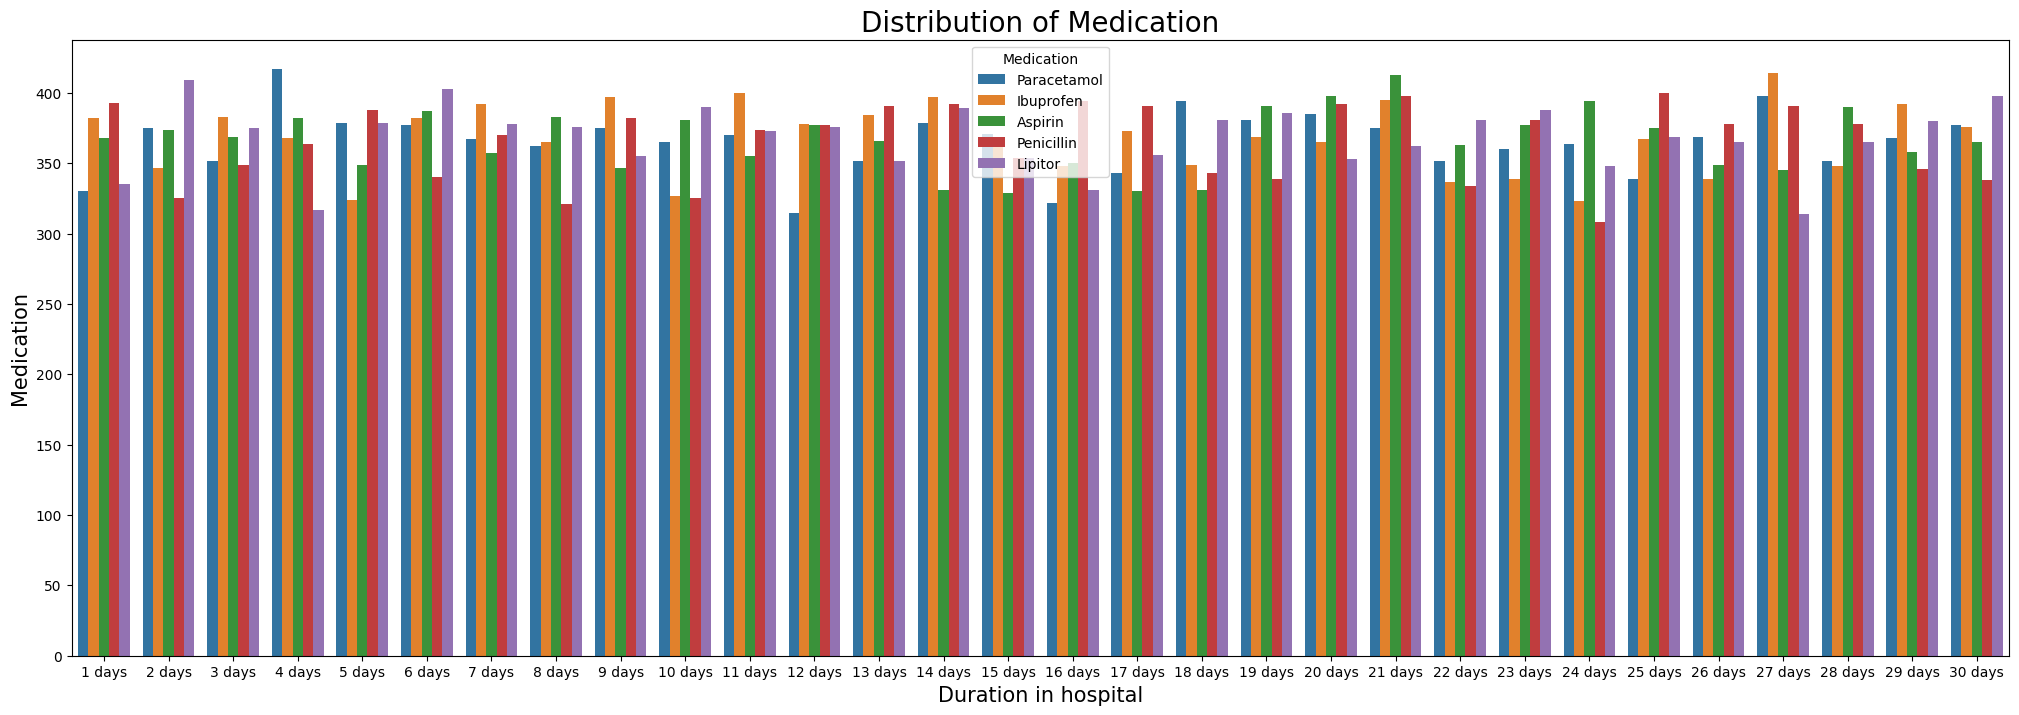

In [407]:
plt.figure(figsize=(25,8))
plt.title('Distribution of Medication',size=20)
plt.xlabel('Duration in hospital',size=15)
plt.ylabel('Medication',size=15)
sns.countplot(x='Duration in hospital',hue='Medication',data=df, order=df['Duration in hospital'].value_counts().index.sort_values())
plt.show()

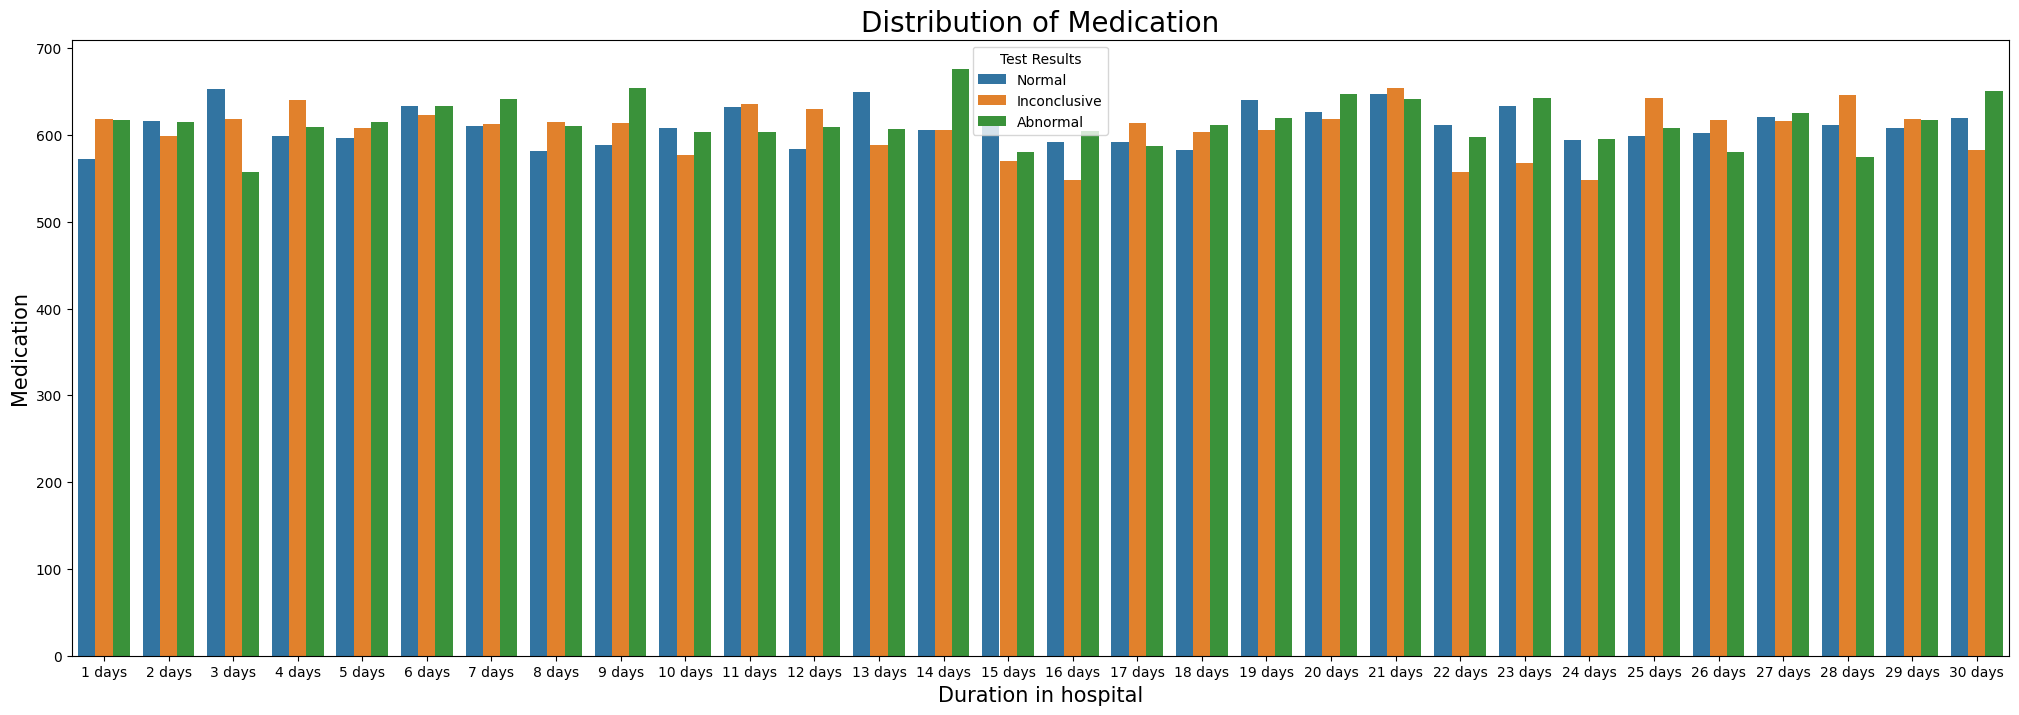

In [408]:
plt.figure(figsize=(25,8))
plt.title('Distribution of Medication',size=20)
plt.xlabel('Duration in hospital',size=15)
plt.ylabel('Medication',size=15)
sns.countplot(x='Duration in hospital',hue='Test Results',data=df, order=df['Duration in hospital'].value_counts().index.sort_values())
plt.show()

In [409]:
df.drop(columns=['Date of Admission','Doctor','Hospital','Discharge Date','Duration in hospital'],inplace=True)

In [410]:
df=pd.get_dummies(df,columns=['Gender','Blood Type','Medical Condition','Admission Type','Insurance Provider','Medication'])

In [412]:
df['Test Results'].replace(('Normal','Inconclusive','Abnormal'),(0,1,2),inplace=True)

In [413]:
df.dtypes

Age                                      int64
Billing Amount                         float64
Test Results                             int64
Gender_Female                             bool
Gender_Male                               bool
Blood Type_A+                             bool
Blood Type_A-                             bool
Blood Type_AB+                            bool
Blood Type_AB-                            bool
Blood Type_B+                             bool
Blood Type_B-                             bool
Blood Type_O+                             bool
Blood Type_O-                             bool
Medical Condition_Arthritis               bool
Medical Condition_Asthma                  bool
Medical Condition_Cancer                  bool
Medical Condition_Diabetes                bool
Medical Condition_Hypertension            bool
Medical Condition_Obesity                 bool
Admission Type_Elective                   bool
Admission Type_Emergency                  bool
Admission Typ

In [414]:
df.astype(int).dtypes

Age                                    int64
Billing Amount                         int64
Test Results                           int64
Gender_Female                          int64
Gender_Male                            int64
Blood Type_A+                          int64
Blood Type_A-                          int64
Blood Type_AB+                         int64
Blood Type_AB-                         int64
Blood Type_B+                          int64
Blood Type_B-                          int64
Blood Type_O+                          int64
Blood Type_O-                          int64
Medical Condition_Arthritis            int64
Medical Condition_Asthma               int64
Medical Condition_Cancer               int64
Medical Condition_Diabetes             int64
Medical Condition_Hypertension         int64
Medical Condition_Obesity              int64
Admission Type_Elective                int64
Admission Type_Emergency               int64
Admission Type_Urgent                  int64
Insurance 

In [415]:
df.corr()

,Age,Billing Amount,Test Results,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Insurance Provider_Aetna,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
Age,1.000000,-0.003427,0.006974,0.002510,-0.002510,0.001099,-0.001803,-0.000483,-0.000903,0.006662,...,0.003781,0.004179,-0.002764,-0.003581,-0.001566,0.007467,0.001353,-0.006700,0.000954,-0.003065
Billing Amount,-0.003427,1.000000,0.002635,-0.004939,0.004939,0.003144,0.001441,-0.005119,0.004160,-0.003202,...,0.000188,0.002077,-0.000650,0.002964,-0.004573,0.001872,0.007067,-0.007275,0.000447,-0.002109
Test Results,0.006974,0.002635,1.000000,0.005073,-0.005073,0.001793,-0.000557,-0.001631,-0.002909,0.000855,...,-0.000328,-0.004907,0.003460,0.002483,-0.000736,-0.000956,-0.000514,0.000040,0.002775,-0.001343
Gender_Female,0.002510,-0.004939,0.005073,1.000000,-1.000000,0.009626,-0.003226,-0.003559,-0.000811,-0.010209,...,-0.007178,0.003789,0.002366,0.000918,0.000055,0.007243,0.003372,-0.001489,-0.008368,-0.000766
Gender_Male,-0.002510,0.004939,-0.005073,-1.000000,1.000000,-0.009626,0.003226,0.003559,0.000811,0.010209,...,0.007178,-0.003789,-0.002366,-0.000918,-0.000055,-0.007243,-0.003372,0.001489,0.008368,0.000766
Blood Type_A+,0.001099,0.003144,0.001793,0.009626,-0.009626,1.000000,-0.143481,-0.143291,-0.143196,-0.143327,...,-0.005763,0.002608,0.005535,-0.002323,-0.000111,0.004664,0.005084,-0.001346,-0.002565,-0.005848
Blood Type_A-,-0.001803,0.001441,-0.000557,-0.003226,0.003226,-0.143481,1.000000,-0.143315,-0.143219,-0.143350,...,0.003161,0.005715,0.004113,-0.004983,-0.007986,0.005020,-0.003750,0.000655,0.006038,-0.007964
Blood Type_AB+,-0.000483,-0.005119,-0.001631,-0.003559,0.003559,-0.143291,-0.143315,1.000000,-0.143029,-0.143160,...,-0.002207,-0.005813,-0.005696,0.002726,0.010986,-0.006220,0.000806,0.000410,-0.001770,0.006778
Blood Type_AB-,-0.000903,0.004160,-0.002909,-0.000811,0.000811,-0.143196,-0.143219,-0.143029,1.000000,-0.143065,...,-0.001299,0.000186,0.000132,-0.000072,0.001044,-0.003253,-0.004743,-0.003899,0.002302,0.009617
Blood Type_B+,0.006662,-0.003202,0.000855,-0.010209,0.010209,-0.143327,-0.143350,-0.143160,-0.143065,1.000000,...,0.000614,-0.001354,0.000921,-0.008333,0.008155,-0.002865,-0.002160,0.007462,-0.003503,0.001054


<Axes: >

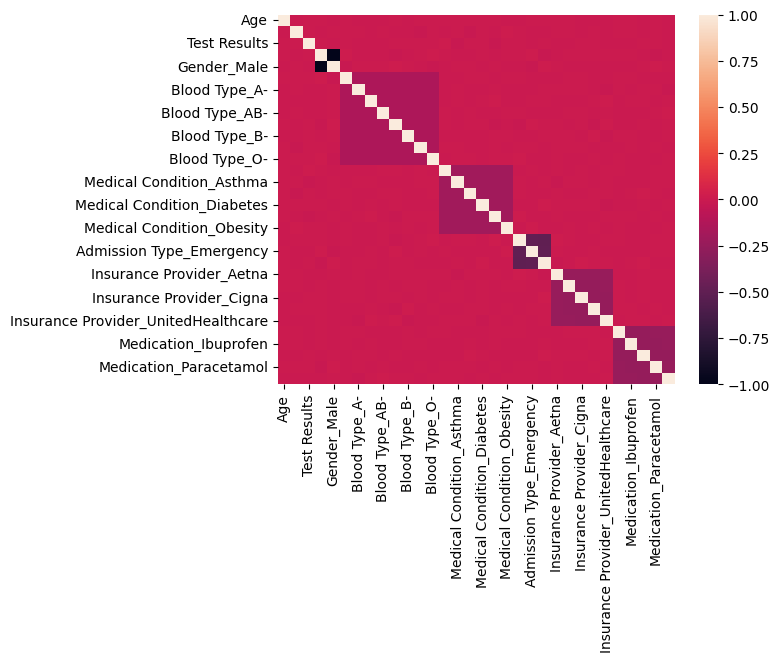

In [416]:
sns.heatmap(df.corr())

In [437]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [418]:
X_data=df.drop('Test Results',axis=1)
y_data=df['Test Results']

In [432]:
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.3,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38476, 31)
(16490, 31)
(38476,)
(16490,)


In [438]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [439]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [440]:
y_pred=model.predict(X_test)
y_pred


array([0, 0, 2, ..., 1, 2, 0])

In [441]:
acc_score=accuracy_score(y_test,y_pred)
acc_score

0.3320194057004245

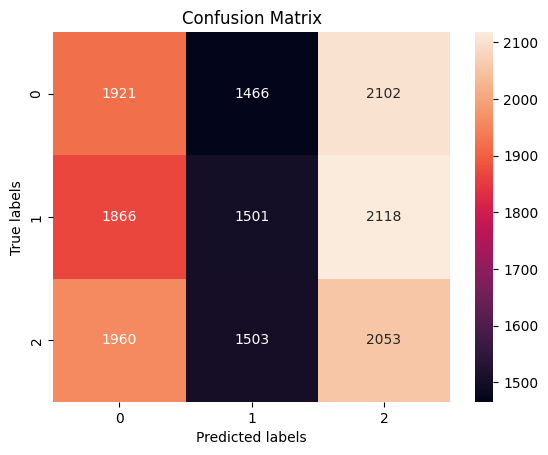

In [442]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()